# A.P. Moller Maersk Case Study 

In [484]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

In [485]:
data_train = pd.read_csv("C:\\Users\\yasha\\Downloads\\DS_ML Coding Challenge Dataset (1).xlsx - Training Dataset.csv") 
data_test = pd.read_csv("C:\\Users\\yasha\\Downloads\\DS_ML Coding Challenge Dataset (1).xlsx - Test Dataset.csv")

### Basic Data Exploration

In [486]:
data_train.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76


In [487]:
data_test.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,Jun-21,103.68
1,NTM1,X1,A10,DIRECT,Large,Powder,Jun-21,155.75
2,NTM1,X1,A10,ECOM,Large,Powder,Jun-21,143.02
3,NTM1,X1,A11,DIRECT,Large,Powder,Jun-21,139.39
4,NTM1,X1,A2,DIRECT,Large,Powder,Jun-21,169.42


In [488]:
print(data_train.shape)

(550176, 8)


In [489]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550176 entries, 0 to 550175
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ProductType        550176 non-null  object 
 1   Manufacturer       550176 non-null  object 
 2   Area Code          550176 non-null  object 
 3   Sourcing Channel   550176 non-null  object 
 4   Product Size       550176 non-null  object 
 5   Product Type       550176 non-null  object 
 6   Month of Sourcing  550176 non-null  object 
 7   Sourcing Cost      550176 non-null  float64
dtypes: float64(1), object(7)
memory usage: 33.6+ MB


In [490]:
columns = data_train.columns
columns

Index(['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel',
       'Product Size', 'Product Type', 'Month of Sourcing', 'Sourcing Cost'],
      dtype='object')

In [491]:
categorical_columns = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel',
       'Product Size', 'Product Type']

In [492]:
for column in columns:
    print(f'{column} --- {data_train[column].unique()} --- {data_train[column].nunique()}')

ProductType --- ['NTM3' 'NTM2' 'NTM1'] --- 3
Manufacturer --- ['X1' 'X2' 'X3'] --- 3
Area Code --- ['A28' 'A9' 'A20' 'A18' 'A10' 'A19' 'A29' 'A7' 'A2' 'A8' 'A4' 'A6' 'A30'
 'A35' 'A44' 'A45' 'A31' 'A25' 'A37' 'A32' 'A34' 'A46' 'A11' 'A39' 'A41'
 'A17' 'A38' 'A5' 'A22' 'A3' 'A12' 'A24' 'A36' 'A42' 'A14' 'A43' 'A33'
 'A15' 'A40' 'A21' 'A16' 'A13' 'A1' 'A23' 'A26'] --- 45
Sourcing Channel --- ['WHOLESALE' 'DIRECT' 'RETAIL' 'ECOM'] --- 4
Product Size --- ['Large' 'Small' 'ExtraLarge'] --- 3
Product Type --- ['Powder' 'Liquid'] --- 2
Month of Sourcing --- ['May-21' 'Oct-20' 'Dec-20' 'Feb-21' 'Nov-20' 'Sep-20' 'Mar-21' 'Jan-21'
 'Apr-21' 'Jul-20' 'Aug-20'] --- 11
Sourcing Cost --- [1.016000e+01 1.342800e+02 1.246000e+01 ... 1.411072e+04 1.263047e+04
 3.705000e+03] --- 4529


In [493]:
data_train

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76
...,...,...,...,...,...,...,...,...
550171,NTM2,X1,A5,DIRECT,Large,Powder,Jul-20,136.47
550172,NTM3,X1,A14,DIRECT,Large,Liquid,Oct-20,72.56
550173,NTM2,X1,A5,DIRECT,Small,Powder,Mar-21,147.64
550174,NTM2,X1,A7,DIRECT,Small,Powder,Feb-21,150.04


### EDA

C:\Users\yasha\AppData\Local\Temp\ipykernel_24976\2179442865.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data_train, ax=ax, palette="inferno")
C:\Users\yasha\AppData\Local\Temp\ipykernel_24976\2179442865.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data_train, ax=ax, palette="inferno")
C:\Users\yasha\AppData\Local\Temp\ipykernel_24976\2179442865.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data_train, ax=ax, palette="inferno")
C:\Users\yasha\AppData\Local\Temp\ipyker

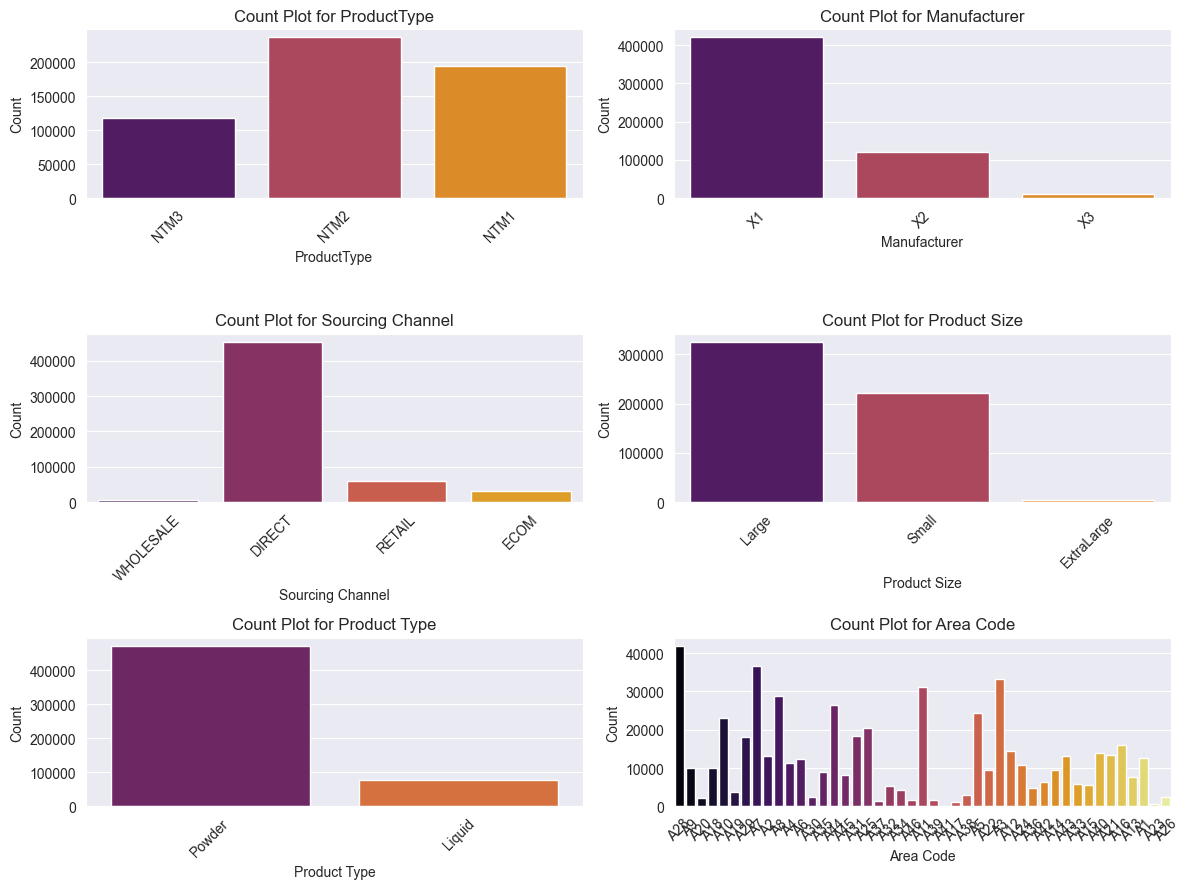

In [494]:
columns_for_count_plot = ['ProductType', 'Manufacturer', 'Sourcing Channel', 'Product Size', 'Product Type', 'Area Code']

num_cols = len(columns_for_count_plot)
num_rows = (num_cols + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 3 * num_rows))

axes = axes.flatten()

for i, (column, ax) in enumerate(zip(columns_for_count_plot, axes), start=1):
    sns.countplot(x=column, data=data_train, ax=ax, palette="inferno")
    ax.set_title(f"Count Plot for {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()


The above count plots were made to check if some class of some feature has significantly less contribution 

### Detecting outliers and handling them

The approach for identifying outliers involves utilizing boxplots due to their capacity to prominently emphasize outliers within the data.

To address the issue of outliers causing the majority of data to be squeezed within the boxplot visualization, a refinement was implemented by segmenting the data into deciles, each comprising 10% of the dataset. Subsequently, boxplots were generated for each decile, facilitating clearer visibility of outliers without compromising the visualization of the entire dataset.


In [495]:
quartiles = data_train['Sourcing Cost'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [496]:
data_train_q1 = data_train[data_train['Sourcing Cost'] <= quartiles.iloc[0]]
data_train_q2 = data_train[(data_train['Sourcing Cost'] > quartiles.iloc[0]) & (data_train['Sourcing Cost'] <= quartiles.iloc[1])]
data_train_q3 = data_train[(data_train['Sourcing Cost'] > quartiles.iloc[1]) & (data_train['Sourcing Cost'] <= quartiles.iloc[2])]
data_train_q4 = data_train[(data_train['Sourcing Cost'] > quartiles.iloc[2]) & (data_train['Sourcing Cost'] <= quartiles.iloc[3])]
data_train_q5 = data_train[(data_train['Sourcing Cost'] > quartiles.iloc[3]) & (data_train['Sourcing Cost'] <= quartiles.iloc[4])]
data_train_q6 = data_train[(data_train['Sourcing Cost'] > quartiles.iloc[4]) & (data_train['Sourcing Cost'] <= quartiles.iloc[5])]
data_train_q7 = data_train[(data_train['Sourcing Cost'] > quartiles.iloc[5]) & (data_train['Sourcing Cost'] <= quartiles.iloc[6])]
data_train_q8 = data_train[(data_train['Sourcing Cost'] > quartiles.iloc[6]) & (data_train['Sourcing Cost'] <= quartiles.iloc[7])]
data_train_q9 = data_train[(data_train['Sourcing Cost'] > quartiles.iloc[7]) & (data_train['Sourcing Cost'] <= quartiles.iloc[8])]
data_train_q10 = data_train[data_train['Sourcing Cost'] > quartiles.iloc[8]]

In [497]:
data_frames = [data_train_q1, data_train_q2, data_train_q3, data_train_q4, data_train_q5,
               data_train_q6, data_train_q7, data_train_q8, data_train_q9, data_train_q10]

for i, df in enumerate(data_frames, start=1):
    print(f"Length of DataFrame Q{i}: {len(df)}")

Length of DataFrame Q1: 55213
Length of DataFrame Q2: 54905
Length of DataFrame Q3: 54983
Length of DataFrame Q4: 54986
Length of DataFrame Q5: 55050
Length of DataFrame Q6: 55328
Length of DataFrame Q7: 55687
Length of DataFrame Q8: 54232
Length of DataFrame Q9: 54910
Length of DataFrame Q10: 54882


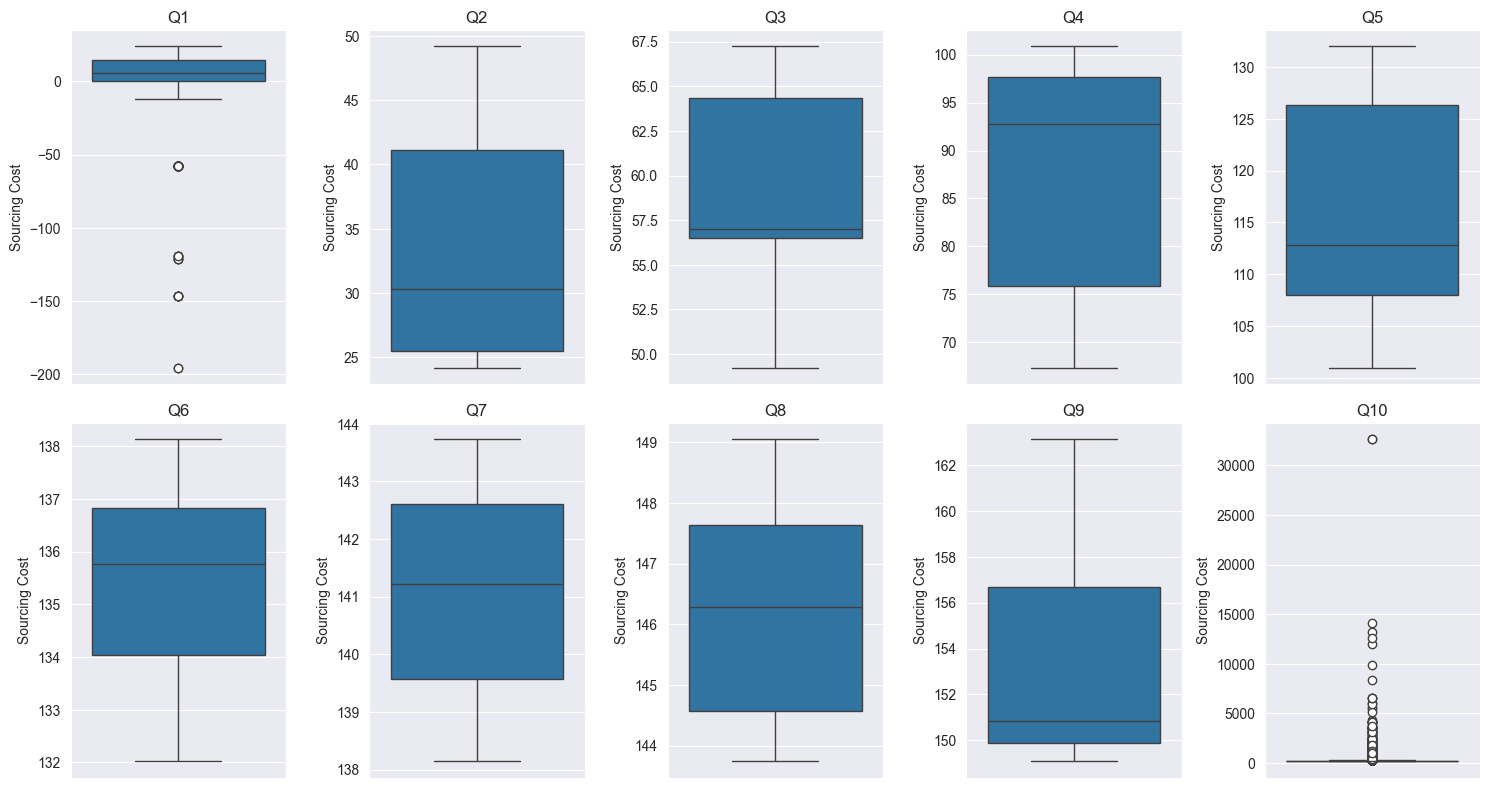

In [498]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8))
axes = axes.flatten()
for i, (df, ax) in enumerate(zip(data_frames, axes), start=1):
    sns.boxplot(data=df['Sourcing Cost'], flierprops={"markerfacecolor": "white"}, ax=ax)
    ax.set_title(f"Q{i}")
    ax.set_xlabel('')
plt.tight_layout()
plt.show()

Within the aforementioned set of 10 boxplots, outliers were detected primarily within the first and tenth deciles (Q1 and Q10). Notably, negative instances were identified as outliers within Q1, while the majority of instances within the tenth decile posed a challenge. Consequently, a decision was made to exclude the negative instances and the entirety of the tenth decile from further analysis.

In [499]:
indices_to_drop = data_train_q10.index
data_train = data_train.drop(indices_to_drop)
data_train.reset_index(drop=True, inplace=True)

In [500]:
data_train

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM1,X1,A10,DIRECT,Large,Powder,Sep-20,137.93
...,...,...,...,...,...,...,...,...
495289,NTM2,X1,A5,DIRECT,Large,Powder,Jul-20,136.47
495290,NTM3,X1,A14,DIRECT,Large,Liquid,Oct-20,72.56
495291,NTM2,X1,A5,DIRECT,Small,Powder,Mar-21,147.64
495292,NTM2,X1,A7,DIRECT,Small,Powder,Feb-21,150.04


In [501]:
positive_sourcing_cost = data_train[data_train['Sourcing Cost']>0]
data_train = positive_sourcing_cost
data_train

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM1,X1,A10,DIRECT,Large,Powder,Sep-20,137.93
...,...,...,...,...,...,...,...,...
495289,NTM2,X1,A5,DIRECT,Large,Powder,Jul-20,136.47
495290,NTM3,X1,A14,DIRECT,Large,Liquid,Oct-20,72.56
495291,NTM2,X1,A5,DIRECT,Small,Powder,Mar-21,147.64
495292,NTM2,X1,A7,DIRECT,Small,Powder,Feb-21,150.04


### Preprocessing (Encoding primarily)

During the preprocessing stage, encoding was a critical consideration. The feature "Product Size" was label encoded due to its inherent order, while the remaining features were encoded using one-hot encoding technique.

In [502]:
def apply_encoding_and_preprocess(data):

    columns_for_labelencoding = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Type']
    data = pd.get_dummies(data, columns=columns_for_labelencoding)

    label_encoder = LabelEncoder()
    data['Product Size'] = label_encoder.fit_transform(data['Product Size'])


    data['Month of Sourcing'] = pd.to_datetime(data['Month of Sourcing'], format='%b-%y')
    data['Sourcing Cost'] = data['Sourcing Cost'].astype(int)
    data['Month of Sourcing'] = data['Month of Sourcing'].apply(lambda x: x.timestamp())
    data['Month of Sourcing'] = data['Month of Sourcing'].astype(int)

    return data

In [503]:
train_data = apply_encoding_and_preprocess(data_train)
train_data.head()

,Product Size,Month of Sourcing,Sourcing Cost,ProductType_NTM1,ProductType_NTM2,ProductType_NTM3,Manufacturer_X1,Manufacturer_X2,Manufacturer_X3,Area Code_A1,...,Area Code_A6,Area Code_A7,Area Code_A8,Area Code_A9,Sourcing Channel_DIRECT,Sourcing Channel_ECOM,Sourcing Channel_RETAIL,Sourcing Channel_WHOLESALE,Product Type_Liquid,Product Type_Powder
0,1,1619827200,10,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1,1,1601510400,134,False,True,False,True,False,False,False,...,False,False,False,True,True,False,False,False,False,True
2,1,1606780800,12,False,False,True,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
3,2,1612137600,107,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,True,False,True
4,1,1598918400,137,True,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True


In [504]:
test_data = apply_encoding_and_preprocess(data_test)
test_data.head()

,Product Size,Month of Sourcing,Sourcing Cost,ProductType_NTM1,ProductType_NTM2,ProductType_NTM3,Manufacturer_X1,Manufacturer_X2,Manufacturer_X3,Area Code_A1,...,Area Code_A6,Area Code_A7,Area Code_A8,Area Code_A9,Sourcing Channel_DIRECT,Sourcing Channel_ECOM,Sourcing Channel_RETAIL,Sourcing Channel_WHOLESALE,Product Type_Liquid,Product Type_Powder
0,2,1622505600,103,True,False,False,True,False,False,True,...,False,False,False,False,True,False,False,False,False,True
1,1,1622505600,155,True,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,1,1622505600,143,True,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
3,1,1622505600,139,True,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
4,1,1622505600,169,True,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True


### Train-Test Split for Machine Learning

During the training and testing phase, the target feature selected was "Sourcing Cost," while the remaining features were included as part of the training dataset.

In [505]:
X_train = train_data.drop(['Sourcing Cost'], axis=1)
y_train = train_data['Sourcing Cost']

In [506]:
X_train.shape ,y_train.shape

((479518, 59), (479518,))

In [507]:
X_test = test_data.drop(['Sourcing Cost'], axis=1)
y_test= test_data['Sourcing Cost']


## Machine Learning Algorithms

### Random Forest Regressor

In [508]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [509]:
y_pred = model.predict(X_test)

In [510]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean absolute Error:", mae)

Mean Squared Error: 560.3817615209534
Mean absolute Error: 14.638512011431397


### LightGBM

In [515]:
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_test, label= y_test, reference=train_data)

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'early_stopping_rounds': 10,  # Specify early stopping rounds here
    'verbose': -1
}

num_rounds = 200
model = lgb.train(params, train_data, num_rounds, valid_sets=[val_data])

y_pred = model.predict(X_test, num_iteration=model.best_iteration)

In [516]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("Mean Squared Error on Validation Set:", mse)
print("Mean absolute Error on Validation Set:", mae)

Mean Squared Error on Validation Set: 600.3355129817522
Mean absolute Error on Validation Set: 14.707459963703224


### Decision Tree Regressor

In [513]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [514]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("Mean Squared Error: ", mse)
print("Mean absolute Error: ", mae)

Mean Squared Error:  550.602947256274
Mean absolute Error:  14.506227921968486


## Methodology followed
### First Approach

In the initial approach, a straightforward Brute-Force methodology was adopted to lay the foundation for subsequent refinements. Each feature was label encoded without extensive deliberation, and three models—Random Forest Regressor, LightGBM, and Decision Tree Regressor—were employed. The outcomes obtained were as follows:


|         | **Random Forest Regressor** | **LightGBM** | **Decision Tree Regressor** |  
|---------|-----------------------------|--------------|-----------------------------|
| **MSE** | 5442                        | 4982         | 5529                        |
| **MAE** | 138                         | 129          | 140                         |

.

### Next Approach (The Final Approach)

This approach took a series of iterations of refinements. 
- Features demonstrating an inherent order were subjected to appropriate encoding methods, while one-hot encoding was applied to the remaining features.
- Subsequently, attention was directed towards outlier management. Initially, a box plot was constructed for the sole numerical column, "Sourcing Cost," revealing the presence of outliers. However, these outliers posed a visual challenge by compressing the rest of the data. To mitigate this issue, the dataset was segmented into 10 deciles, resulting in an improved visualization. Upon closer examination, outliers in the form of negative instances and elevated values within the 10th decile were identified. These outliers were subsequently removed, leading to a significant improvement in model performance, reducing the mean squared error from thousands to hundreds.
- Following the outlier handling phase, attention shifted towards fine-tuning the hyperparameters of the employed models. The culmination of these efforts yielded the subsequent results:

|         | **Random Forest Regressor** | **LightGBM** | **Decision Tree Regressor** |  
|---------|-----------------------------|--------------|-----------------------------|
| **MSE** | 560.3                       | 600.3        | 550.6                       |
| **MAE** | 14.6                        | 14.7         | 14.5                        |

The Decision Tree model emerged as the most effective, yielding the best results among the models tested. Therefore, it has been selected as the optimal and final model for this task.




I want to express my heartfelt thanks to A.P. Moller Maersk for the coding challenge opportunity. Working with the provided dataset has been a rewarding learning experience. I've enjoyed the process of refining my approaches, from tackling outlier detection to fine-tuning model hyperparameters. It has been an enriching journey, and I appreciate the chance to engage with the data and enhance my skills.
Thanks and Regards

**Yashasvi Agrawal**
**AIML B**
**PRN: 21070126116**
